# **Setup**

* https://towardsdatascience.com/the-new-best-python-package-for-visualising-network-graphs-e220d59e054e
* https://github.com/bl3e967/medium-gravis-demo

In [1]:
import networkx as nx
import numpy as np
import uuid
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl

# **Create Network Graph**

In [ ]:
def get_new_test_graph():
    NUM_NODES = 50
    p = 0.5
    seed = 1
    test_graph = nx.dual_barabasi_albert_graph(n=NUM_NODES, p=p, seed=seed, m1=2, m2=1)

    # add node properties
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
        data['node_identifier'] = str(uuid.uuid4())
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

    # add edge properties
    for _, _, data in test_graph.edges(data=True):
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
    
    return test_graph

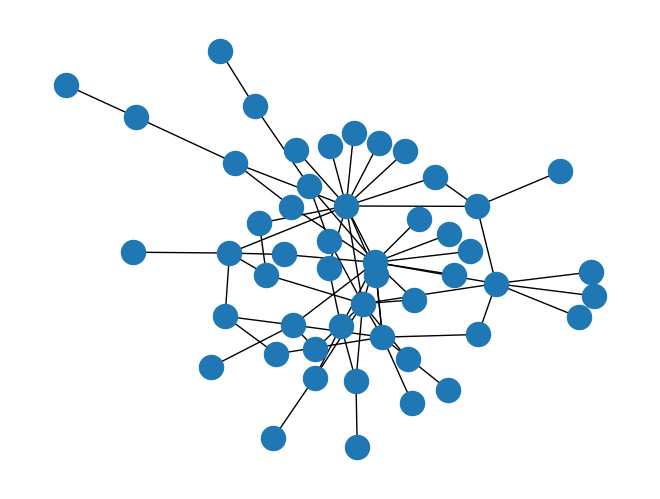

In [3]:
test_graph = get_new_test_graph()
nx.draw(test_graph)

# **Color Helper**

In [ ]:
class MplColorHelper:

    def __init__(self, cmap_name, start_val, stop_val):
        self.cmap_name = cmap_name
        self.cmap = plt.get_cmap(cmap_name)
        self.norm = mpl.colors.Normalize(vmin=start_val, vmax=stop_val)
        self.scalarMap = cm.ScalarMappable(norm=self.norm, cmap=self.cmap)

    def get_rgba(self, val):
        return self.scalarMap.to_rgba(val, bytes=True)

    def get_rgb_str(self, val):
        r, g, b, a = self.get_rgba(val)
        return f"rgb({r},{g},{b})"

# **Plotting With Gravis**

In [9]:
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
cm_name = "winter"
node_colors = MplColorHelper(cm_name, betweenness_min, betweenness_max)

vals = nx.get_edge_attributes(test_graph, 'feature1').values()
val_min, val_max = min(vals), max(vals)
edge_colors = MplColorHelper(cm_name, val_min, val_max)

for node, data in test_graph.nodes(data=True):
    data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])
    data['click'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['feature1']:.3f}" + 
        f"\nfeature 2: {data['feature2']:.3f}" + 
        f"\nfeature 3: {data['feature3']:.3f}" + 
        f"\nBetweenness Centrality: {data['betweenness_centrality']:.3f}" + 
        f"\nDegree: {data['degree']}"
    )

for u, v, data in test_graph.edges(data=True):
    data['color'] = edge_colors.get_rgb_str(data['feature1'])
    data['click'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" + 
        f"\nfeature 1: {data['feature1']}" + 
        f"\nfeature 2: {data['feature2']}"
    )

In [10]:
import gravis as gv 
gv.d3(
test_graph, 
    
# graph specs
graph_height=500,

# node specs
node_size_data_source="betweenness_centrality",
use_node_size_normalization=True,
node_size_normalization_min=15,
node_size_normalization_max=35,
show_node_label=True,
node_label_data_source='node_identifier',

# edge specs
edge_size_data_source='feature1',
use_edge_size_normalization=True,
edge_size_normalization_min=1,
edge_size_normalization_max=5,

# force-directed graph specs
many_body_force_strength=-500)

# **Homogenous Graph Generator**

## **Test Graph Generator**

In [11]:
def get_new_test_digraph():
    NUM_NODES = 50
    test_graph = nx.scale_free_graph(n=NUM_NODES, seed=0, alpha=0.5, beta=0.2, gamma=0.3)

    # append node properties
    nx.set_node_attributes(test_graph, dict(test_graph.degree()), name='degree')
    nx.set_node_attributes(test_graph, nx.betweenness_centrality(test_graph), name='betweenness_centrality')

    for node, data in test_graph.nodes(data=True):
            
        data['node_type'] = 0 if node < 25 else 1

        data['node_identifier'] = str(uuid.uuid4())
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        data['feature3'] = 1 if np.random.random() > 0.5 else 0

    # append edge properties
    for u, v, data in test_graph.edges(data=True):
        data['feature1'] = np.random.random()
        data['feature2'] = np.random.randint(0, high=100)
        
    return test_graph

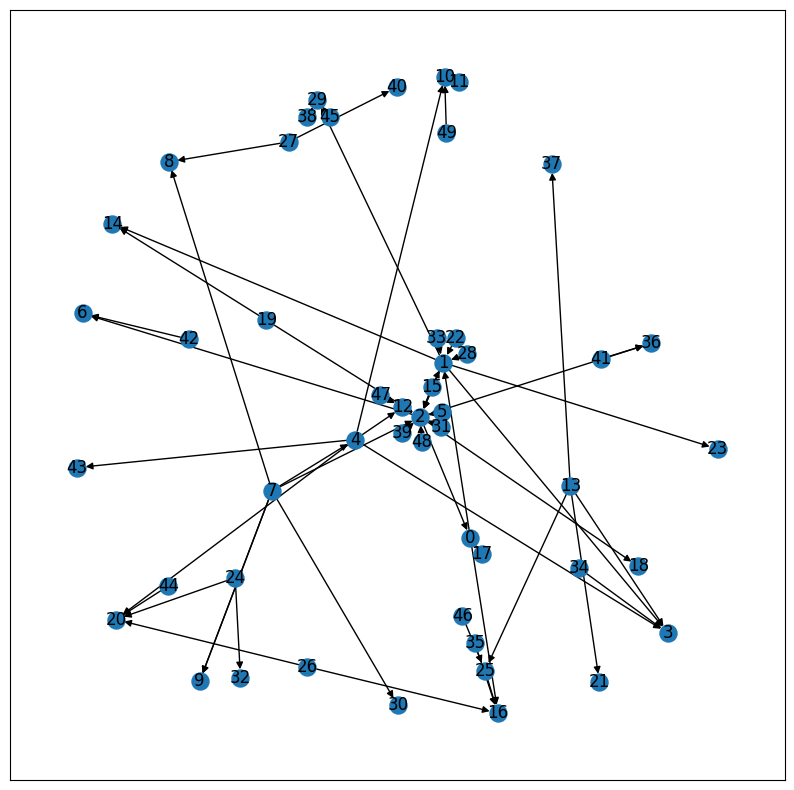

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
test_graph = get_new_test_digraph()
nx.draw_networkx(test_graph, node_size=150)

## **Confirm Node & Edge Attributes**

In [13]:
# prep node color generator
vals = nx.get_node_attributes(test_graph, 'betweenness_centrality').values()
betweenness_min, betweenness_max = min(vals), max(vals)
cm_name = "winter"
node_colors = MplColorHelper(cm_name, betweenness_min, betweenness_max)

for node, data in test_graph.nodes(data=True):
    data['value'] = data['betweenness_centrality'] # node size
    data['label'] = data['node_identifier'] 
    data['title'] = (
        f"Node: {data['node_identifier']}"
        "\nNode Features:" +
        f"\nfeature 1: {data['feature1']}" + 
        f"\nfeature 2: {data['feature2']}" + 
        f"\nfeature 3: {data['feature3']}" + 
        f"\nBetweenness Centrality: {data['betweenness_centrality']}" + 
        f"\nDegree: {data['degree']}"
    ) 
    data['color'] = node_colors.get_rgb_str(data['betweenness_centrality'])
    data['shape'] = 'dot' if data['node_type'] == 0 else 'triangle'
    
for u, v, data in test_graph.edges(data=True):
    # data['value'] = data['feature1']
    data['color'] = edge_colors.get_rgb_str(data['feature1'])
    data['title'] = (
        f"Edge: {test_graph.nodes[u]['node_identifier']} -> {test_graph.nodes[v]['node_identifier']}" +
        f"\nEdge Features:" + 
        f"\nfeature 1: {data['feature1']}" + 
        f"\nfeature 2: {data['feature2']}"
    )

## **Set Edge Curvature**

In [14]:
import gravis as gv 

gv.d3(
    test_graph, 

    graph_height=700,
    
    node_size_data_source="betweenness_centrality",
    use_node_size_normalization=True,
    node_size_normalization_min=15,
    node_size_normalization_max=35,
    show_node_label=False,
    node_label_data_source='node_identifier',
    
    edge_size_data_source='feature1',
    use_edge_size_normalization=True,
    edge_size_normalization_min=1,
    edge_size_normalization_max=5,
    edge_curvature=-0.5,

    many_body_force_strength=-500
)